Creating plots of how the tuning parameters change in the automatic tuning process (primarily for presentations)

In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from PIL import Image, ImageSequence
import os

In [2]:
log_path = "/home/b/b309170/my_work/published_code/grundner25pnas_iconaml_automatic_tuning/tuning_scripts/auto_tune_iconaml"
output_path = "/work/bd1179/b309170/icon-ml_models/icon-a-ml/run/mp4s"

In [3]:
# Read parameter values into lists
def create_list(file_name, param_ind):
    param_values = []; loss_values = []; net_toa_metric = []
    file_path = os.path.join(log_path, file_name)
    print_bool = False
    with open(file_path, 'r') as file:
        for line in file:
            if print_bool:
                # Append certain parameter value
                param_values.append(float(line.split(',')[param_ind]))
                print_bool = False
            # Append line after "Current list of parameters to tune"
            if line.startswith("Current list of parameters to tune"):
                # Setting Booleans signaling a new simulation
                print_bool = True
                loss_bool = True
            if line.startswith("Loss after adding clt_SE_pac:"):
                if loss_bool:
                    loss_values.append(float(line.split(':')[1]))
                    loss_bool = False
            # TOA value
            if line.startswith("Metric net_toa:"):
                try:
                    net_toa_metric.append(float(file.readline()[2:-2]))
                except:
                    pass 
    return param_values, loss_values, net_toa_metric

#### ICON-A-MLe tuning plots

In [54]:
def plot_parameter_evolution(log_file):
    # All ICON-A-MLe parameters
    param_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'eps', 'pr0', 'entrmid', 'entrpen', 'entrdd', 'cvtfall', 'ccraut', 'cinhomi', 'cinhoml1', 'cinhoml2', 'cinhoml3',
                'cn1lnd', 'cn2lnd', 'cn1sea', 'cn2sea']

    # Grid size (5 rows x 6 columns = 30 slots for 29 parameters)
    n_params = len(param_names)
    n_cols = 5
    n_rows = math.ceil((n_params + 1) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 12))
    axs = axs.flatten()

    for param_ind, param_name in enumerate(param_names):
        param_list, loss_values, _ = create_list(log_file, param_ind) # loss_values should be independent of param_ind
        axs[param_ind].plot(param_list)
        axs[param_ind].hlines(param_list[0], 0, len(param_list), color='blue', ls='--')
        axs[param_ind].hlines(param_list[-1], 0, len(param_list), color='green', ls='--')
        axs[param_ind].set_title(param_name)
        
    # Plot the loss
    axs[n_params].plot(loss_values, color='red')
    axs[n_params].hlines(loss_values[0], 0, len(loss_values), color='blue', ls='--', label='Initial')
    axs[n_params].hlines(loss_values[-1], 0, len(loss_values), color='green', ls='--', label='Final')
    axs[n_params].legend()
    axs[n_params].set_title('Objective value')

    # Turn off unused subplots if any
    for i in range(n_params+1, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    # plt.show()

    return fig, axs

Plots for daily tuning

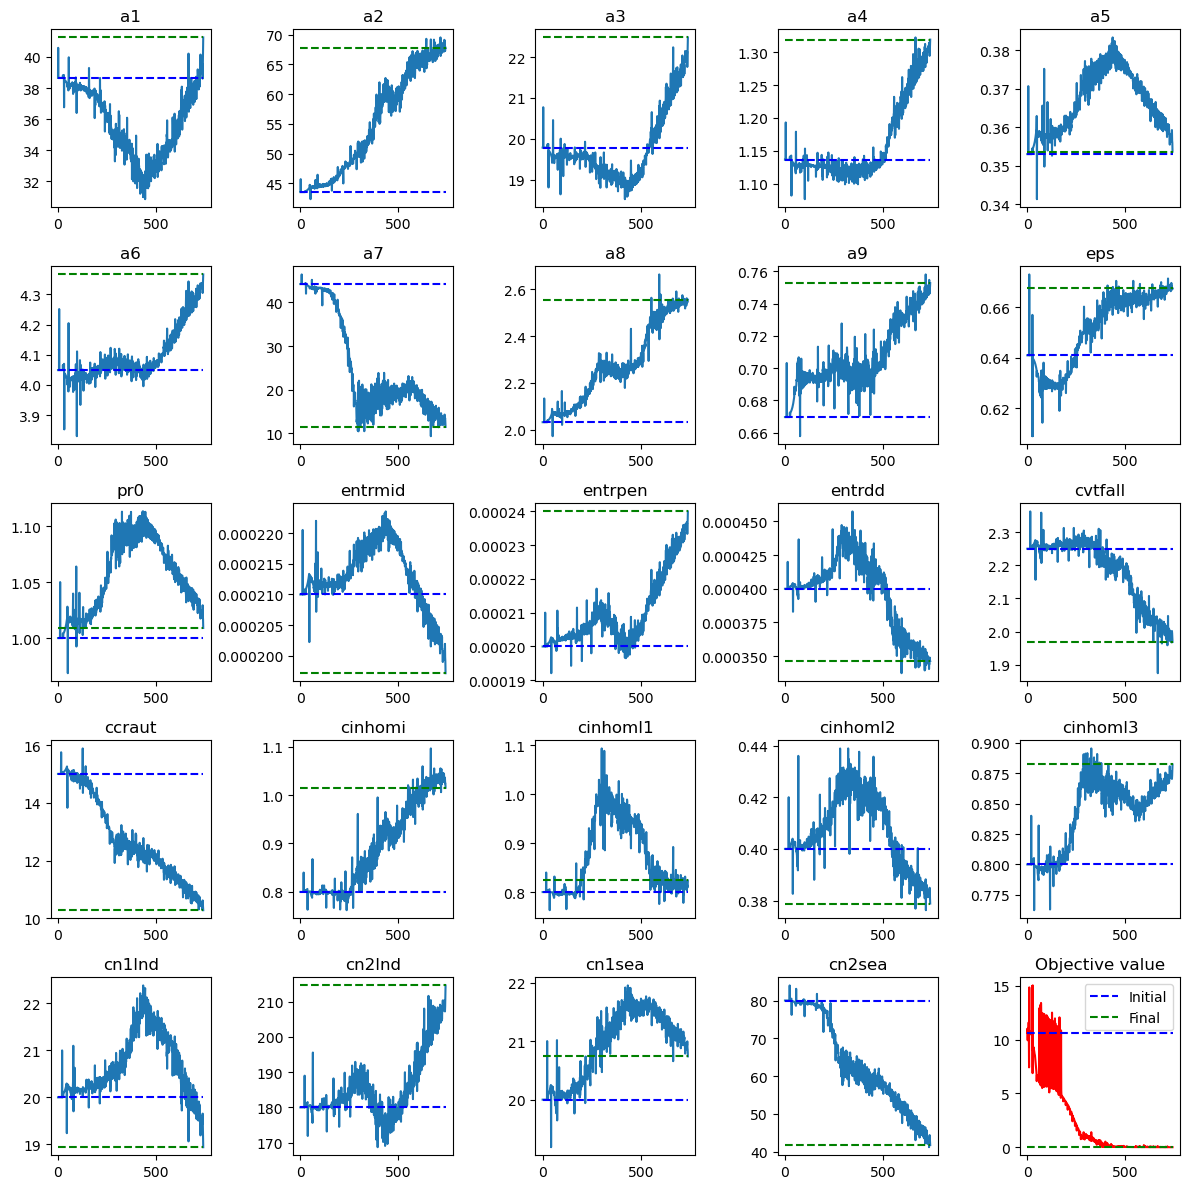

In [53]:
daily_fig, daily_axs = plot_parameter_evolution("log.auto_tune.12876603.o")

Plots for weekly tuning

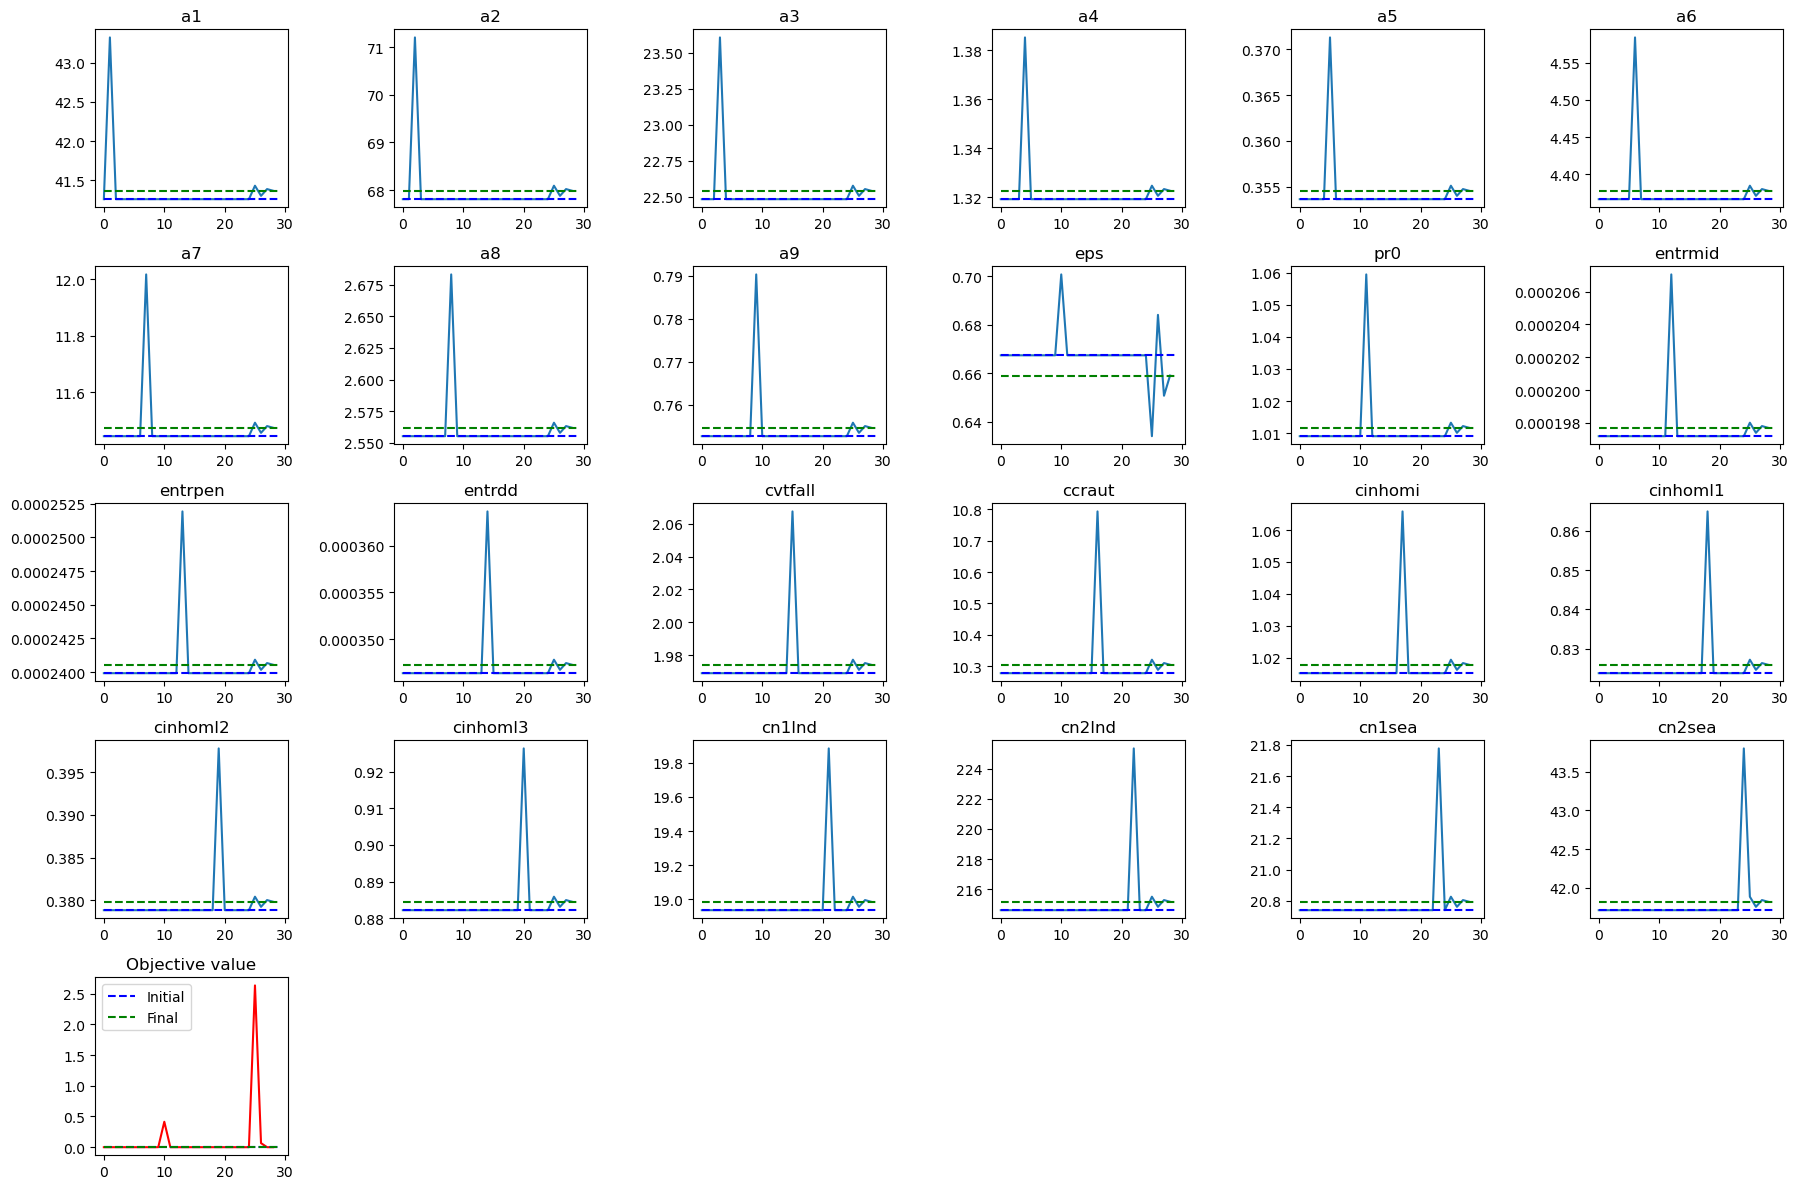

In [24]:
weekly_fig, weekly_axs = plot_parameter_evolution("log.auto_tune.12889494.o")

Plots for monthly tuning

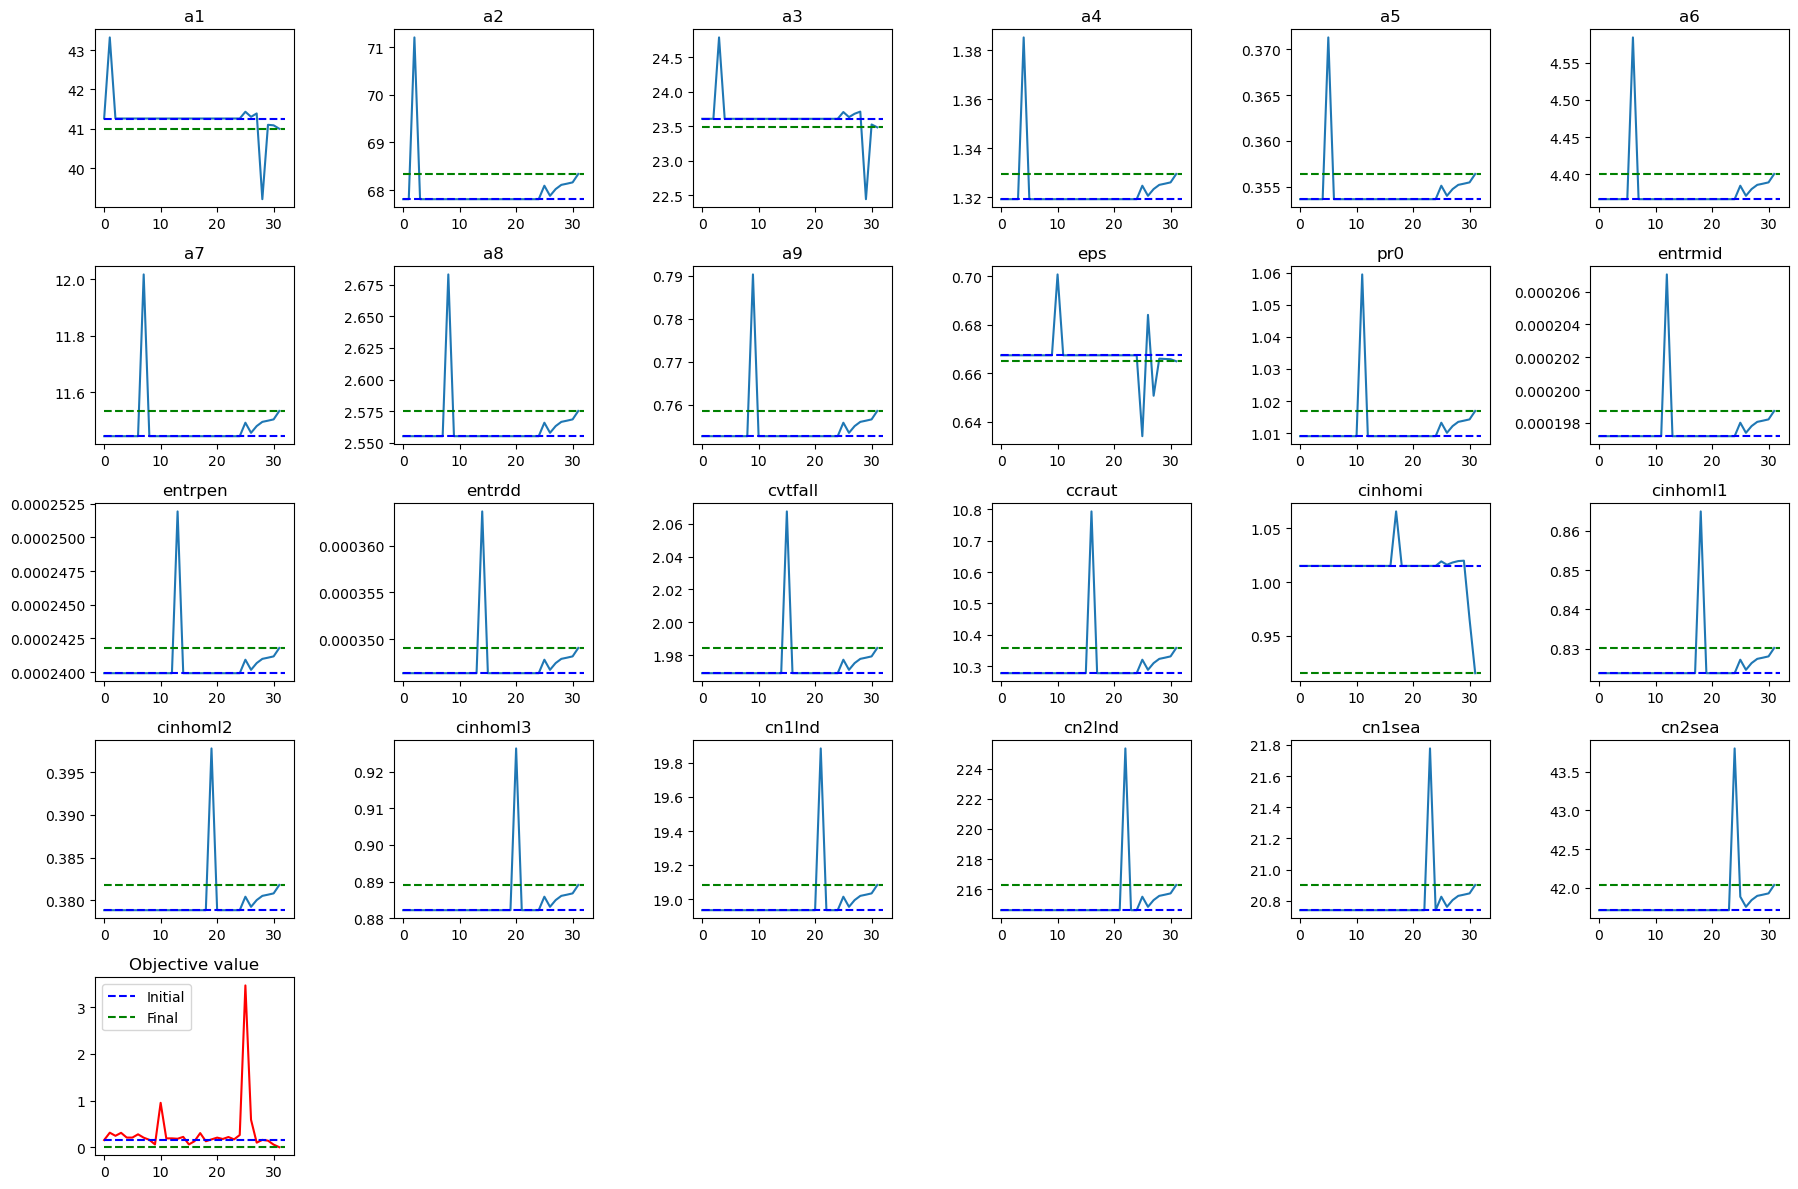

In [34]:
monthly_fig, monthly_axs = plot_parameter_evolution("log.auto_tune.12892616.o")

Plots for yearly tuning

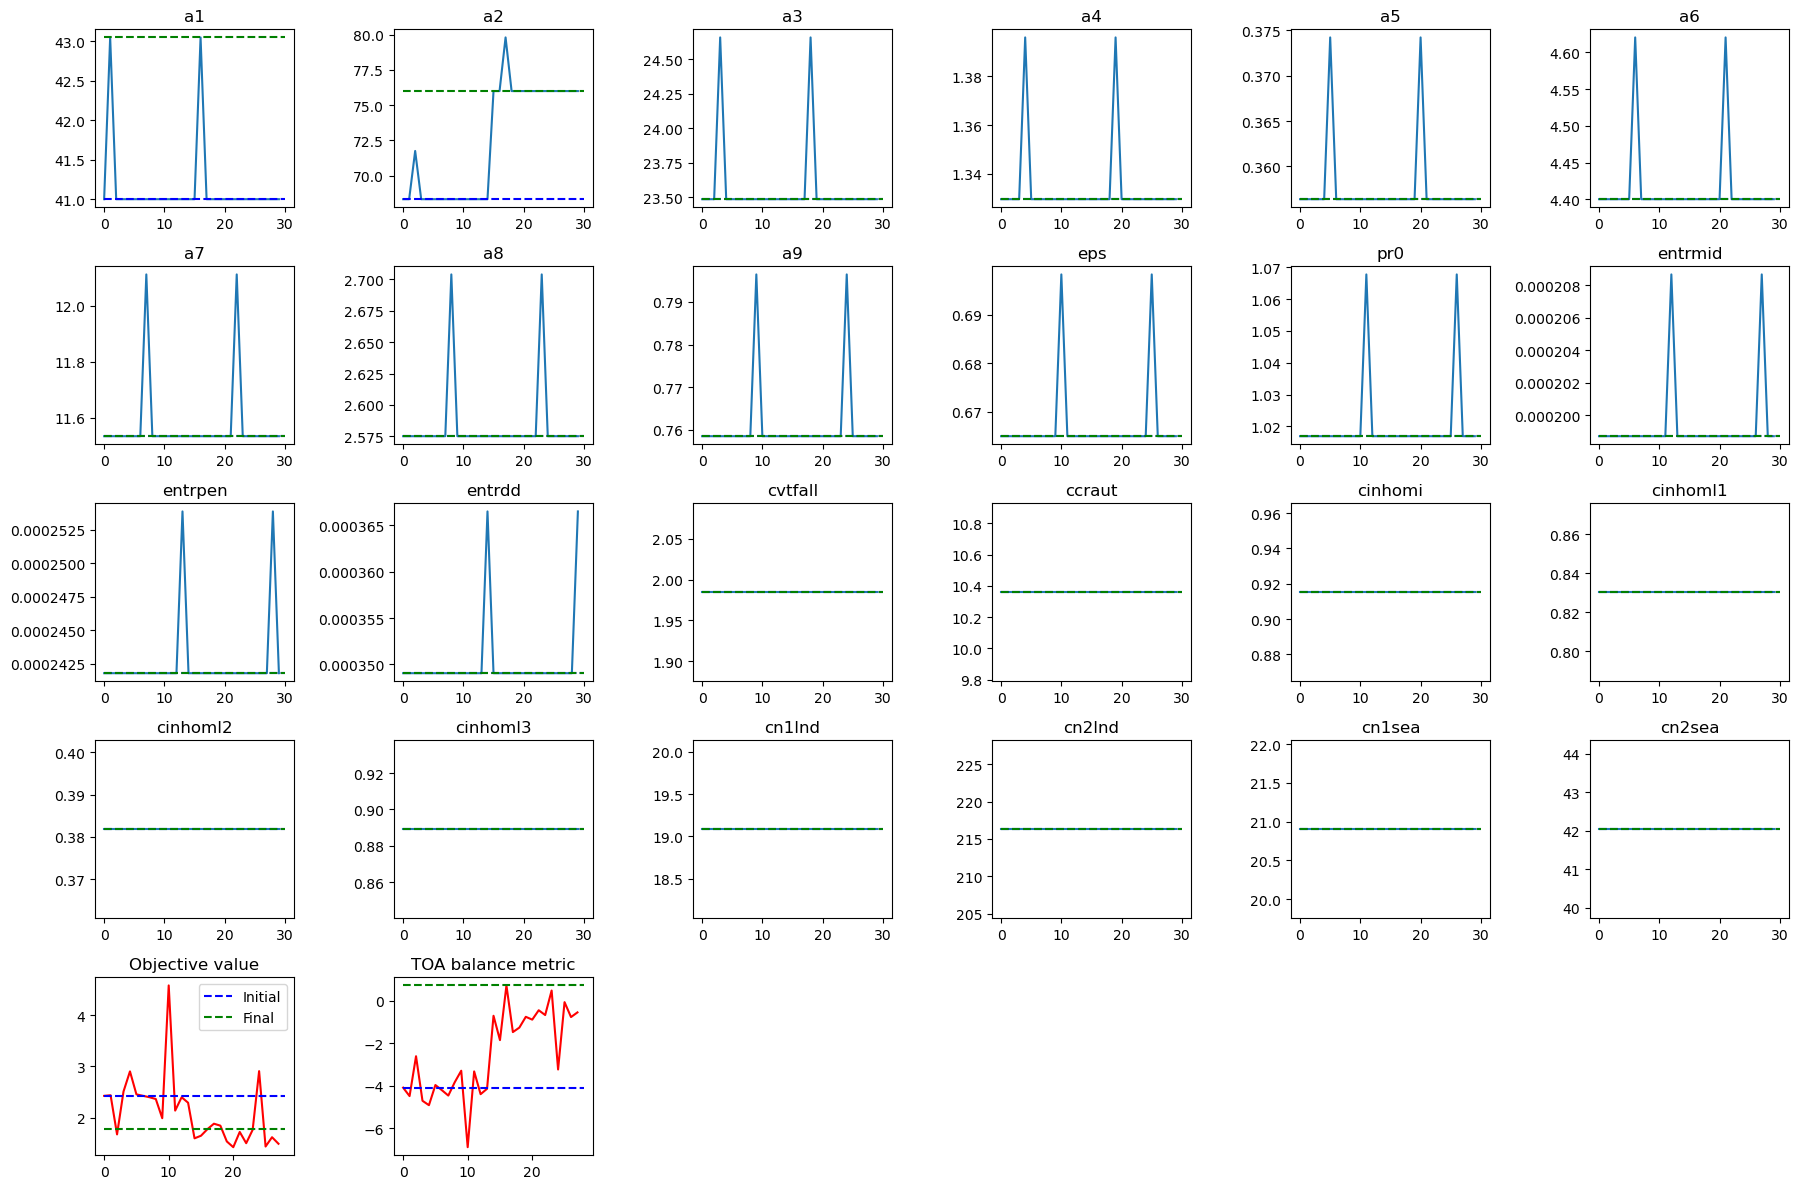

In [43]:
# All ICON-A-MLe parameters
param_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'eps', 'pr0', 'entrmid', 'entrpen', 'entrdd', 'cvtfall', 'ccraut', 'cinhomi', 'cinhoml1', 'cinhoml2', 'cinhoml3',
               'cn1lnd', 'cn2lnd', 'cn1sea', 'cn2sea']

# Grid size (5 rows x 6 columns = 30 slots for 29 parameters)
n_params = len(param_names)
n_cols = 6
n_rows = math.ceil((n_params + 2) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axs = axs.flatten()

for param_ind, param_name in enumerate(param_names):
    param_list_1, loss_values_1, toa_metric_1 = create_list("log.auto_tune.12956787.o", param_ind)
    param_list_2, loss_values_2, toa_metric_2 = create_list("log.auto_tune.12962670.o", param_ind)
    param_list = param_list_1 + param_list_2
    loss_values = loss_values_1 + loss_values_2
    toa_metrics = toa_metric_1 + toa_metric_2
    final_ind = np.argwhere(np.array(loss_values) == 1.773)[0,0]
    axs[param_ind].plot(param_list)
    axs[param_ind].hlines(param_list[0], 0, len(param_list), color='blue', ls='--')
    axs[param_ind].hlines(param_list[final_ind], 0, len(param_list), color='green', ls='--')
    axs[param_ind].set_title(param_name)
    
# Plot the loss
axs[n_params].plot(loss_values, color='red')
axs[n_params].hlines(loss_values[0], 0, len(loss_values), color='blue', ls='--', label='Initial')
axs[n_params].hlines(loss_values[final_ind], 0, len(loss_values), color='green', ls='--', label='Final')
axs[n_params].legend()
axs[n_params].set_title('Objective value')

# Plot the TOA balance metric
axs[n_params+1].plot(toa_metrics, color='red')
axs[n_params+1].hlines(toa_metrics[0], 0, len(toa_metrics), color='blue', ls='--')
axs[n_params+1].hlines(toa_metrics[final_ind], 0, len(toa_metrics), color='green', ls='--')
axs[n_params+1].set_title('TOA balance metric')

# Turn off unused subplots if any
for i in range(n_params+2, len(axs)):
    axs[i].axis('off')

yearly_fig, yearly_axs = fig, axs

plt.tight_layout()
plt.show()

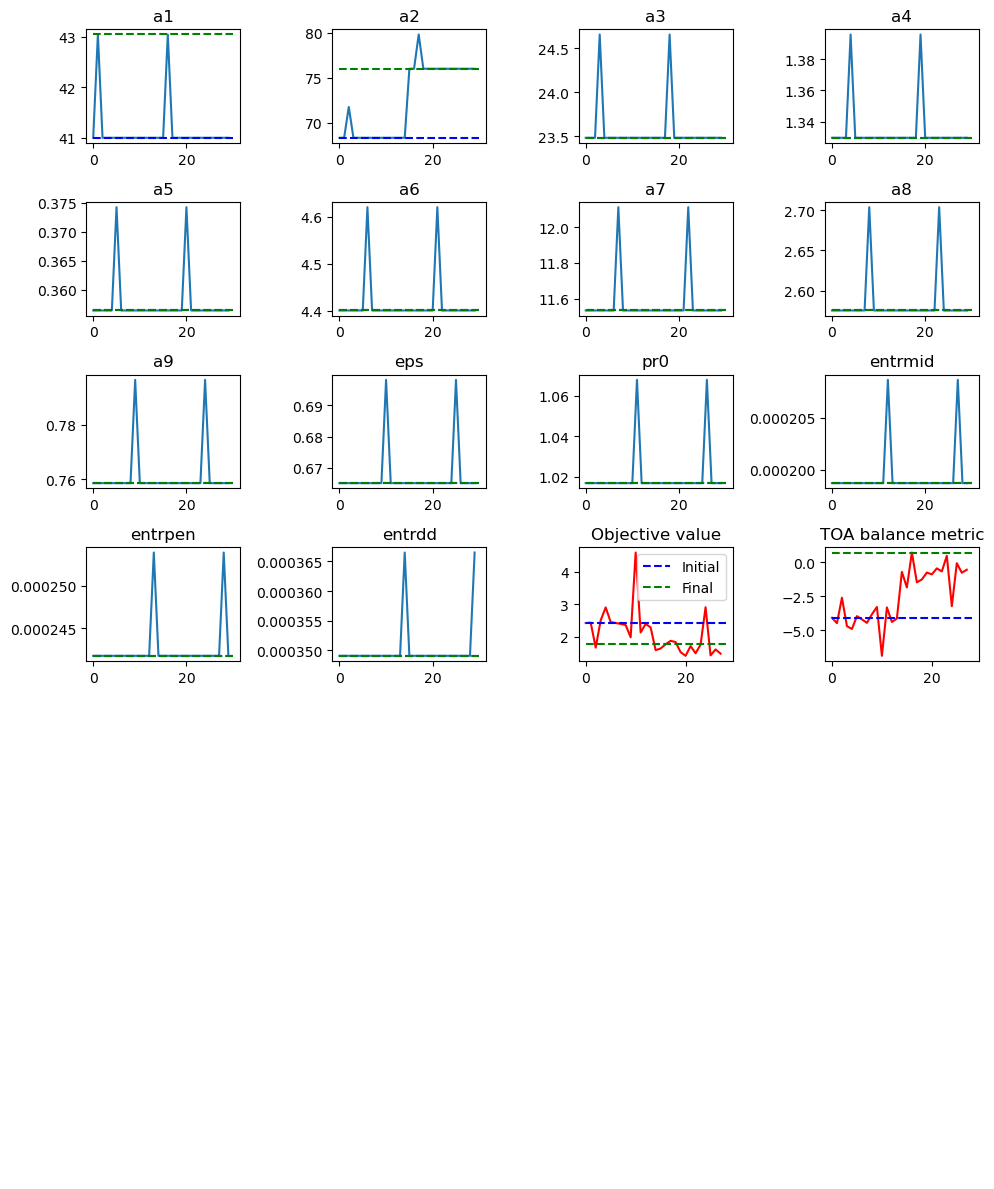

In [47]:
# All ICON-A-MLe parameters
param_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'eps', 'pr0', 'entrmid', 'entrpen', 'entrdd', 'cvtfall', 'ccraut', 'cinhomi', 'cinhoml1', 'cinhoml2', 'cinhoml3',
               'cn1lnd', 'cn2lnd', 'cn1sea', 'cn2sea']

# Grid size (5 rows x 6 columns = 30 slots for 29 parameters)
n_params = len(param_names)
n_cols = 4
n_rows = math.ceil((n_params + 2) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 12))
axs = axs.flatten()

for param_ind, param_name in enumerate(param_names[:14]):
    param_list_1, loss_values_1, toa_metric_1 = create_list("log.auto_tune.12956787.o", param_ind)
    param_list_2, loss_values_2, toa_metric_2 = create_list("log.auto_tune.12962670.o", param_ind)
    param_list = param_list_1 + param_list_2
    loss_values = loss_values_1 + loss_values_2
    toa_metrics = toa_metric_1 + toa_metric_2
    final_ind = np.argwhere(np.array(loss_values) == 1.773)[0,0]
    axs[param_ind].plot(param_list)
    axs[param_ind].hlines(param_list[0], 0, len(param_list), color='blue', ls='--')
    axs[param_ind].hlines(param_list[final_ind], 0, len(param_list), color='green', ls='--')
    axs[param_ind].set_title(param_name)
    
# Plot the loss
axs[14].plot(loss_values, color='red')
axs[14].hlines(loss_values[0], 0, len(loss_values), color='blue', ls='--', label='Initial')
axs[14].hlines(loss_values[final_ind], 0, len(loss_values), color='green', ls='--', label='Final')
axs[14].legend()
axs[14].set_title('Objective value')

# Plot the TOA balance metric
axs[15].plot(toa_metrics, color='red')
axs[15].hlines(toa_metrics[0], 0, len(toa_metrics), color='blue', ls='--')
axs[15].hlines(toa_metrics[final_ind], 0, len(toa_metrics), color='green', ls='--')
axs[15].set_title('TOA balance metric')

# Turn off unused subplots if any
for i in range(16, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

#### ICON-A tuning plots

In [102]:
log_path = "/home/b/b309170/my_work/published_code/grundner25pnas_iconaml_automatic_tuning/tuning_scripts/auto_tune_icona_baseline"

def plot_parameter_evolution(log_file, final_loss):
    # All ICON-A parameters
    param_names = ['crs', 'crt', 'csatsc', 'nex', 'cinv', 'pr0', 'entrmid', 'entrpen', 'entrdd', 'cvtfall', 'ccraut', 'cinhomi', 'cinhoml1', 'cinhoml2', 'cinhoml3',
                'cn1lnd', 'cn2lnd', 'cn1sea', 'cn2sea']

    # Grid size (5 rows x 6 columns = 30 slots for 29 parameters)
    n_params = len(param_names)
    n_cols = 6
    n_rows = math.ceil((n_params + 1) / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 12))
    axs = axs.flatten()

    for param_ind, param_name in enumerate(param_names):
        param_list, loss_values, _ = create_list(log_file, param_ind) # loss_values should be independent of param_ind
        axs[param_ind].plot(param_list)
        axs[param_ind].hlines(param_list[0], 0, len(param_list), color='blue', ls='--')
        final_ind = np.argwhere(np.array(loss_values) == final_loss)[0,0]
        axs[param_ind].hlines(param_list[final_ind], 0, len(param_list), color='green', ls='--')
        axs[param_ind].set_title(param_name)
        
    # Plot the loss
    axs[n_params].plot(loss_values, color='red')
    axs[n_params].hlines(loss_values[0], 0, len(loss_values), color='blue', ls='--', label='Initial')
    axs[n_params].hlines(loss_values[final_ind], 0, len(loss_values), color='green', ls='--', label='Final')
    axs[n_params].legend()
    axs[n_params].set_title('Objective value')

    # Turn off unused subplots if any
    for i in range(n_params+1, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

Plots for daily tuning

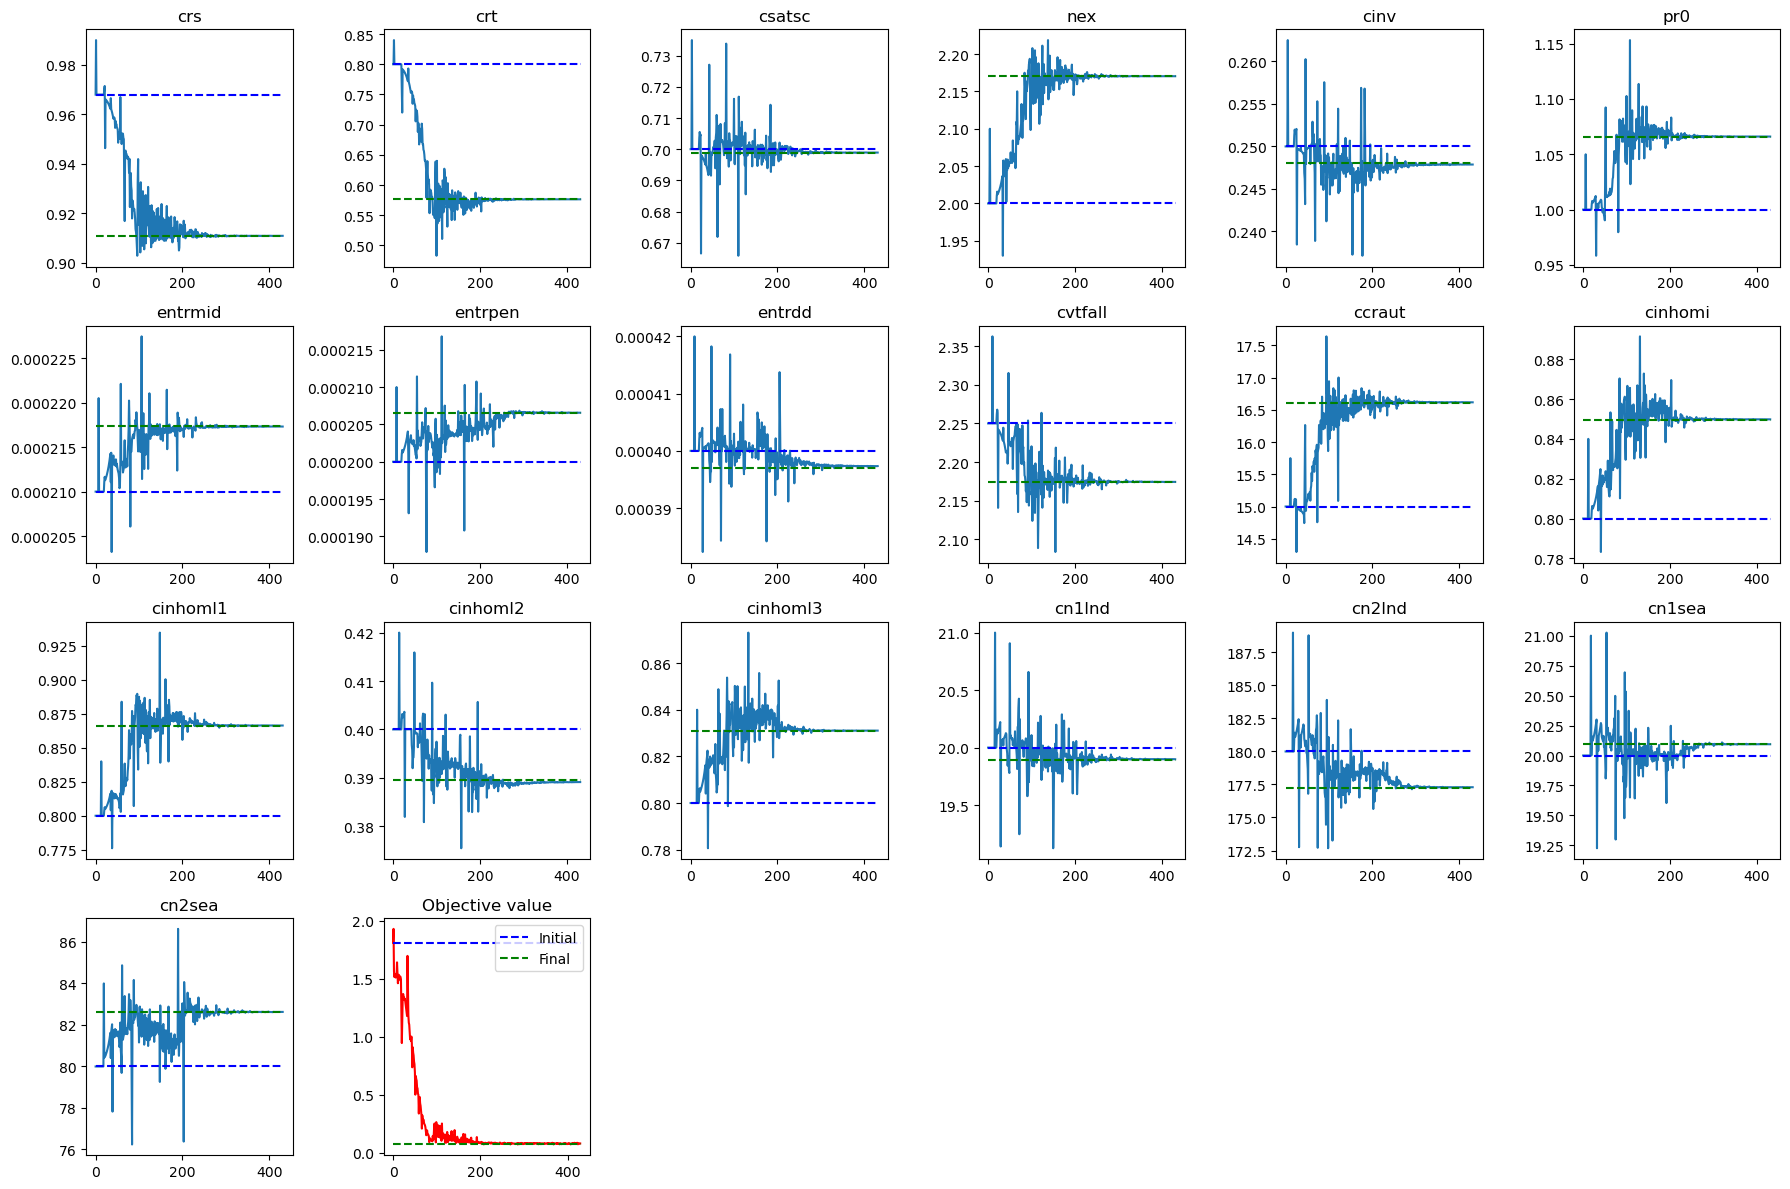

In [103]:
plot_parameter_evolution("log.auto_tune_baseline.13758205.o", final_loss=0.071)

Plots for weekly tuning

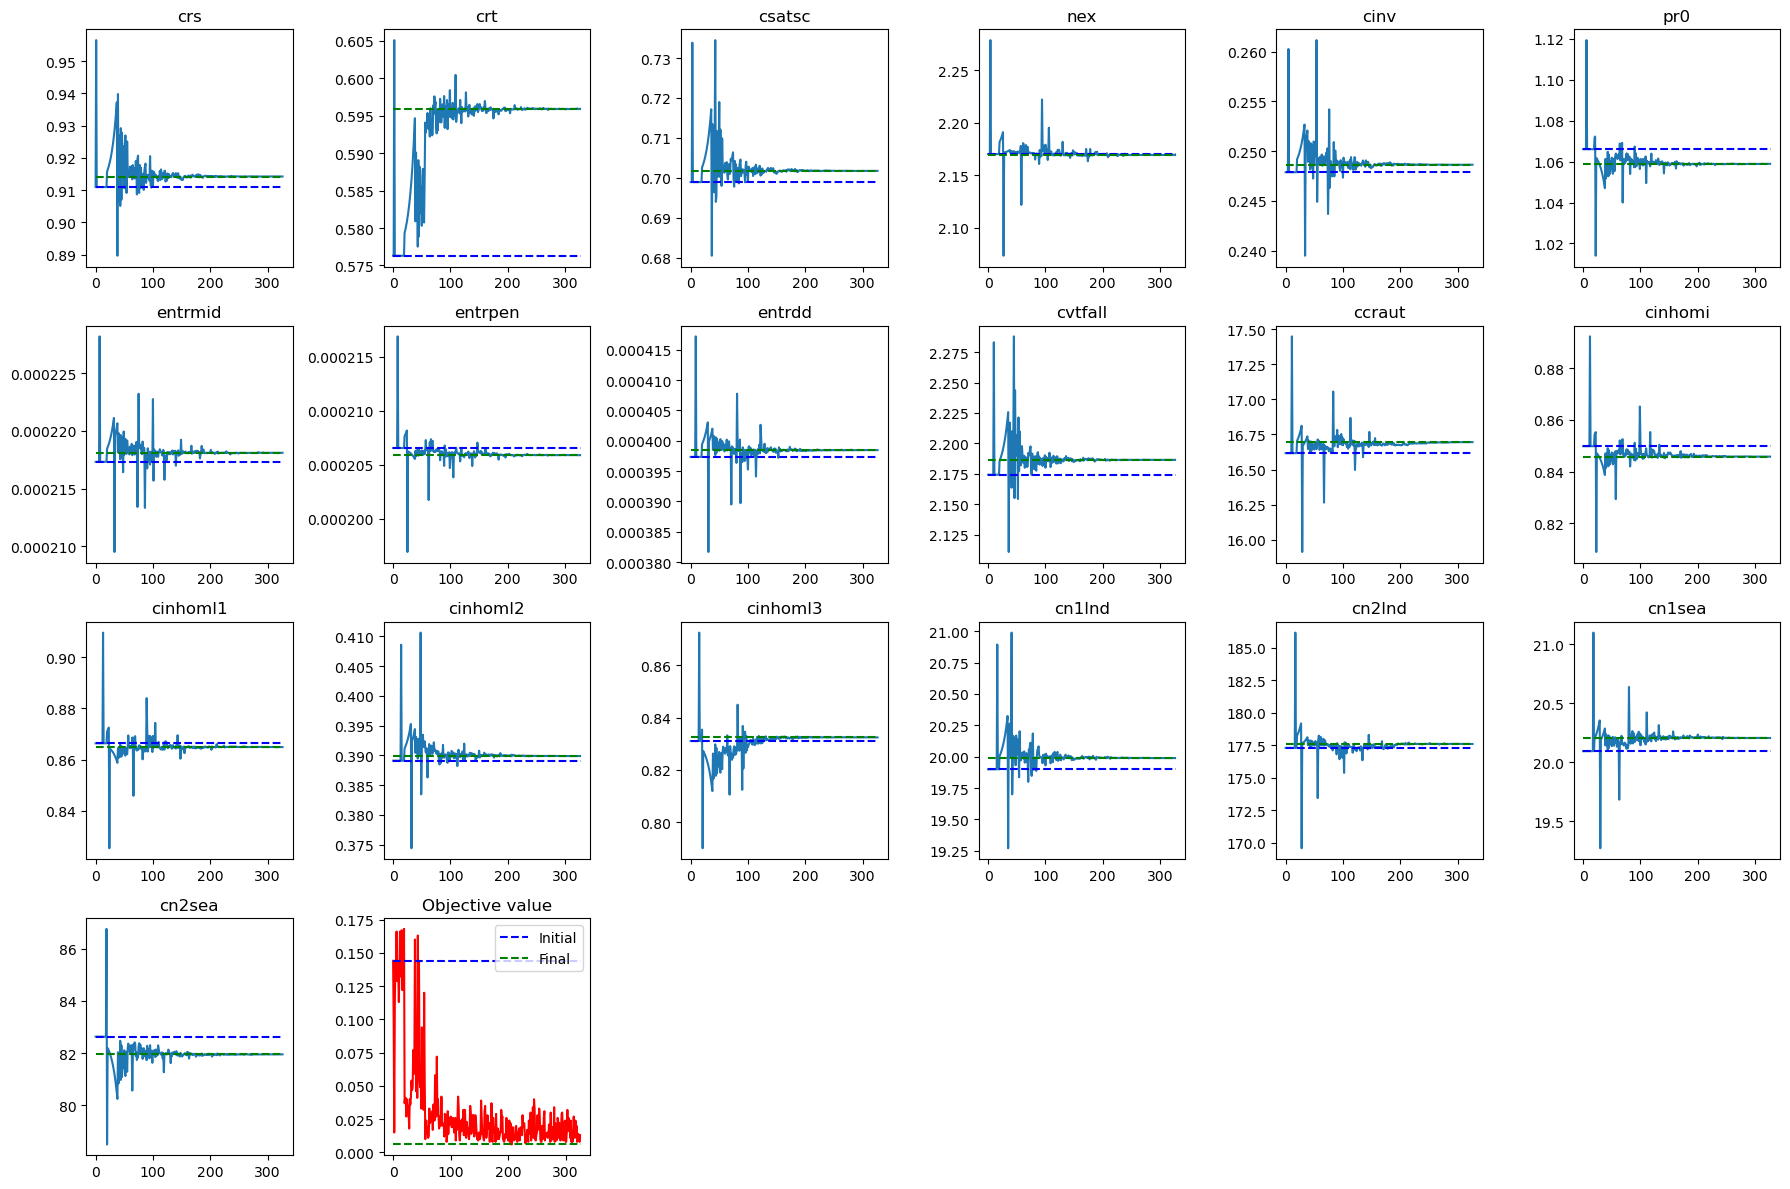

In [104]:
plot_parameter_evolution("log.auto_tune_baseline.13774617.o", final_loss=0.006)

Plots for monthly tuning

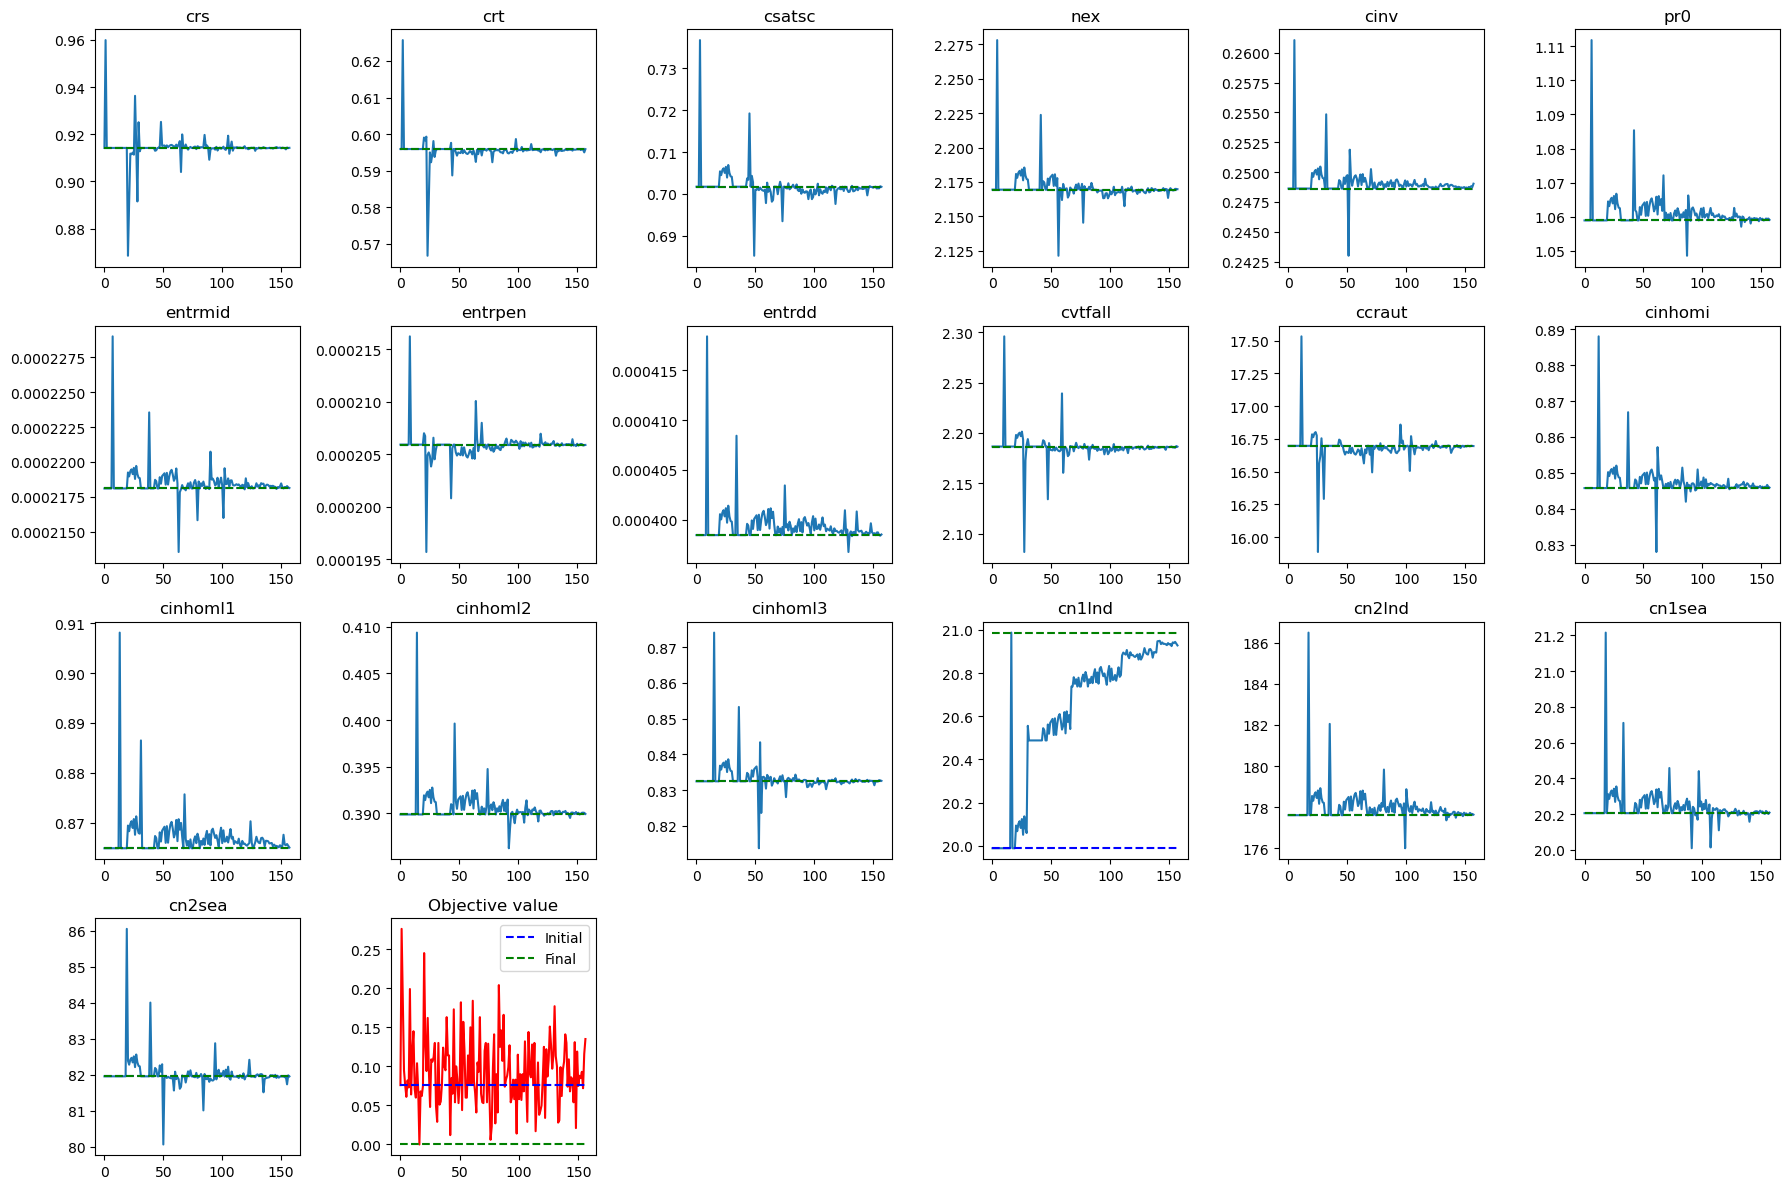

In [105]:
plot_parameter_evolution("log.auto_tune_baseline.13850767.o", final_loss=0.000)

Plots for yearly tuning

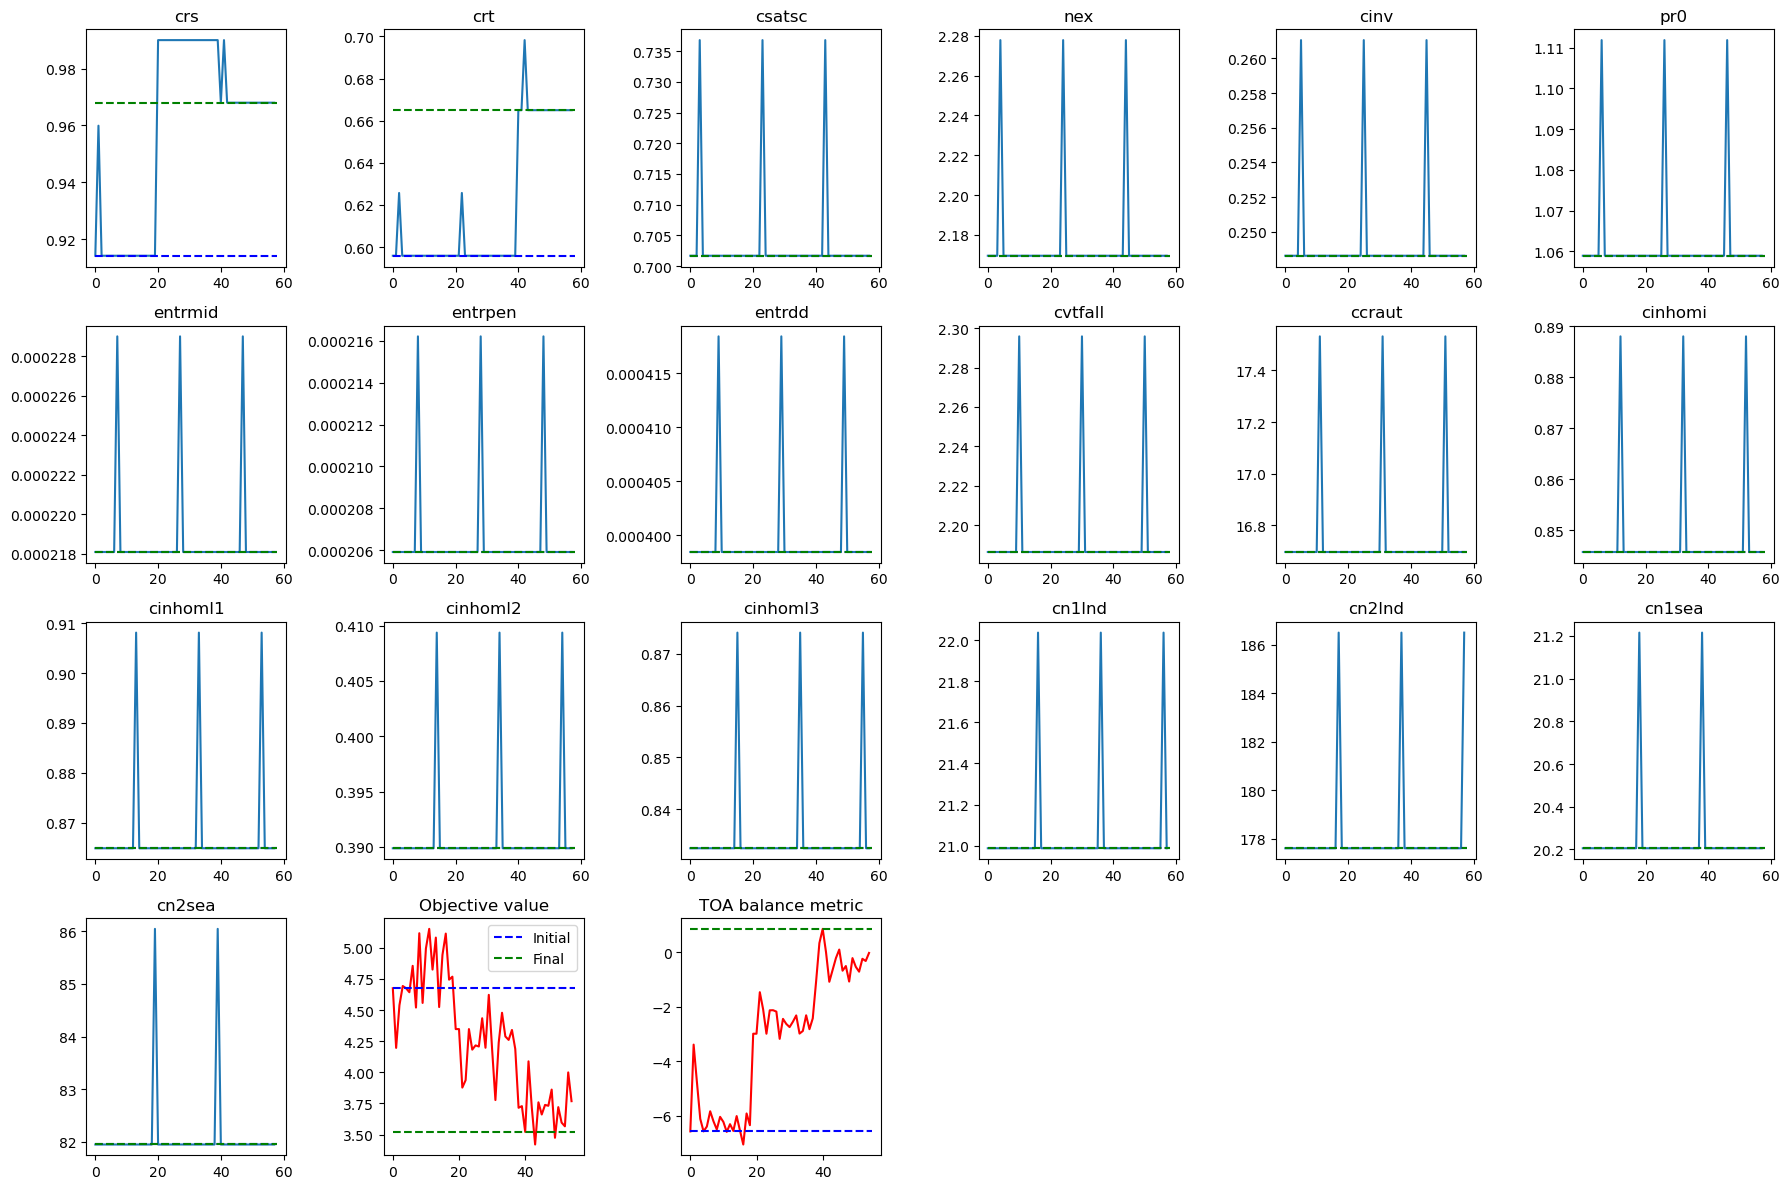

In [106]:
# All ICON-A parameters
param_names = ['crs', 'crt', 'csatsc', 'nex', 'cinv', 'pr0', 'entrmid', 'entrpen', 'entrdd', 'cvtfall', 'ccraut', 'cinhomi', 'cinhoml1', 'cinhoml2', 'cinhoml3',
            'cn1lnd', 'cn2lnd', 'cn1sea', 'cn2sea']

# Grid size (5 rows x 6 columns = 30 slots for 29 parameters)
n_params = len(param_names)
n_cols = 6
n_rows = math.ceil((n_params + 2) / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axs = axs.flatten()

for param_ind, param_name in enumerate(param_names):
    param_list_1, loss_values_1, toa_metric_1 = create_list("log.auto_tune_baseline.13852199.o", param_ind)
    param_list_2, loss_values_2, toa_metric_2 = create_list("log.auto_tune_baseline.17820065.o", param_ind)
    param_list_3, loss_values_3, toa_metric_3 = create_list("log.auto_tune_baseline.13887792.o", param_ind)
    param_list = param_list_1 + param_list_2 + param_list_3
    loss_values = loss_values_1 + loss_values_2 + loss_values_3
    toa_metrics = toa_metric_1 + toa_metric_2 + toa_metric_3
    final_ind = np.argwhere(np.array(loss_values) == 3.521)[0,0]
    axs[param_ind].plot(param_list)
    axs[param_ind].hlines(param_list[0], 0, len(param_list), color='blue', ls='--')
    axs[param_ind].hlines(param_list[final_ind], 0, len(param_list), color='green', ls='--')
    axs[param_ind].set_title(param_name)
    
# Plot the loss
axs[n_params].plot(loss_values, color='red')
axs[n_params].hlines(loss_values[0], 0, len(loss_values), color='blue', ls='--', label='Initial')
axs[n_params].hlines(loss_values[final_ind], 0, len(loss_values), color='green', ls='--', label='Final')
axs[n_params].legend()
axs[n_params].set_title('Objective value')

# Plot the TOA balance metric
axs[n_params+1].plot(toa_metrics, color='red')
axs[n_params+1].hlines(toa_metrics[0], 0, len(toa_metrics), color='blue', ls='--')
axs[n_params+1].hlines(toa_metrics[final_ind], 0, len(toa_metrics), color='green', ls='--')
axs[n_params+1].set_title('TOA balance metric')

# Turn off unused subplots if any
for i in range(n_params+2, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

#### Video attempts

In [ ]:
# Create a video out of the list of parameter values
def make_video(param_list, param_list_next, param_name, gif_name):
    param_list = np.array(param_list)
    interval_range = max(param_list) - min(param_list)
    min_val = min(param_list) - interval_range/10
    max_val = max(param_list) + interval_range/10

    fig, ax = plt.subplots(figsize=(12, 3))
    ax.set_xlim(min_val, max_val)  # space for var_name label
    ax.set_ylim(-1, 2)
    ax.axis('off')

    # Number line
    ax.hlines(0, min_val, max_val, colors='black', linewidth=2)

    # Permanent markers
    start_val = param_list[0]
    if len(param_list_next) > 1:
        end_val = param_list_next[0] # First value of the next list is the tuned value
    elif len(param_list_next) == 1:
        end_val = param_list_next[0] # Provide manually in the case of yearly tuning

    start_dot = ax.plot([start_val], [0], 'o', color='blue', markersize=10)[0]
    end_dot = ax.plot([end_val], [0], 'o', color='green', markersize=10)[0]

    # Labels for start and end points
    ax.text(start_val, -0.3, 'default value', ha='center', va='top', fontsize=10, color='blue')
    ax.text(end_val, -0.3, 'tuned value', ha='center', va='top', fontsize=10, color='green')

    # Variable name to the right
    ax.text(min_val, 0.9, param_name, ha='left', va='center', fontsize=12, fontweight='bold', color='black')

    # Moving point and value label
    point, = ax.plot([], [], 'o', color='crimson', markersize=14)
    label = ax.text(0, 0.5, '', ha='center', va='bottom', fontsize=12, fontweight='bold', color='crimson')

    # Trail history
    trail_length = 15
    trail_dots = [ax.plot([], [], 'o', color='crimson', alpha=0.1 + 0.06*i, markersize=8)[0] for i in range(trail_length)]

    # Add a 5-second pause by repeating the last frame
    pause_frames = int(5 * 30)  # 5 seconds at 30 FPS
    total_frames = len(param_list) + pause_frames

    def update(frame):
        if frame < len(param_list):
            x = param_list[frame]
        else:
            x = param_list[-1]  # hold the last point during pause

        point.set_data([x], [0])
        label.set_position((x, 0.3))
        label.set_text(f"{x:.2f}")

        # Update trail (only if not in pause)
        for i in range(trail_length):
            idx = frame - i - 1
            if 0 <= idx < len(param_list):
                trail_dots[i].set_data([param_list[idx]], [0])
            else:
                trail_dots[i].set_data([], [])

        return [point, label] + trail_dots

    ani = animation.FuncAnimation(
        fig, update, frames=total_frames,
        interval=30, blit=True
    )

    # Save as GIF
    gif_path = os.path.join(output_path, gif_name)
    ani.save(gif_path, writer='pillow', fps=30)

    plt.show()

    return gif_path

# To concatenate daily, weekly, monthly, yearly gifs
def concatenate_gifs(gif_paths, param_name, output_path):
    all_frames = []

    for gif_path in gif_paths:
        with Image.open(gif_path) as im:
            frames = [frame.copy() for frame in ImageSequence.Iterator(im)]
            all_frames.extend(frames)

    # Save concatenated frames as a single gif
    all_frames[0].save(
        os.path.join(output_path, 'combined_number_line_%s.gif'%param_name),
        save_all=True,
        append_images=all_frames[1:],
        duration=30,  # ms per frame
        loop=0
    )

In [ ]:
# Trying with plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np, math, json

param_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'eps', 'pr0', 'entrmid', 'entrpen', 'entrdd', 'cvtfall', 'ccraut', 'cinhomi', 'cinhoml1', 'cinhoml2', 'cinhoml3',
               'cn1lnd', 'cn2lnd', 'cn1sea', 'cn2sea']

logfile   = "log.auto_tune.12876603.o"
records = [create_list(logfile, i)[0] for i in range(len(param_names))]
n_steps = max(len(r) for r in records)        # longest parameter history

# same param_names and records from previous code – ensure they’re in memory

n_params = len(param_names)
n_cols   = 3                                     # fewer columns keeps each subplot large
n_rows   = math.ceil(n_params / n_cols)

fig = make_subplots(rows=n_rows, cols=n_cols, shared_xaxes=False,
                    subplot_titles=param_names, vertical_spacing=0.07)

# frames: one per time step, each contains 29 scatter traces
frames = []
for t in range(n_steps):
    frame_data = []
    for p, name in enumerate(param_names):
        row = p // n_cols + 1
        col = p %  n_cols + 1
        scatter = go.Scatter(x=np.arange(t+1),
                             y=records[p][:t+1],
                             mode='lines',
                             line=dict(width=1))
        frame_data.append(dict(type='scatter', y=scatter.y, x=scatter.x,
                               row=row, col=col))
    frames.append(go.Frame(data=frame_data, name=f"f{t}"))

# static initial traces (empty to start)
for p, name in enumerate(param_names):
    r, c = p // n_cols + 1, p % n_cols + 1
    fig.add_trace(go.Scatter(x=[0], y=[records[p][0]], mode='lines'), row=r, col=c)

fig.frames = frames

# play button
fig.update_layout(
    width=1400, height=2200,
    updatemenus=[dict(type="buttons",
                      buttons=[dict(label="▶ Play",
                                    method="animate",
                                    args=[None,
                                          dict(frame=dict(duration=15, redraw=True),
                                               transition=dict(duration=0),
                                               fromcurrent=True)])],
                      showactive=False,
                      y=1, x=1.05, xanchor="left", yanchor="top")],
    showlegend=False,
)

html_file = "params_trace_interactive.html"
fig.write_html(html_file, include_plotlyjs="cdn")
print(f"Interactive animation written to {html_file}")


In [ ]:
import math, os, numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter        # needs ffmpeg installed

# ---- user edits -------------------------------------------------------------
logfile   = "log.auto_tune.12876603.o"
out_video = "/work/bd1179/b309170/icon-ml_models/tuning/params_trace.mp4"
fps       = 25       # frames‑per‑second
zoom_at   = 0.60     # fraction of trace at which to start zoom‑in
zoom_span = 0.25     # fraction of trace we stay zoomed before zoom‑out
# -----------------------------------------------------------------------------

param_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'eps', 'pr0', 'entrmid', 'entrpen', 'entrdd', 'cvtfall', 'ccraut', 'cinhomi', 'cinhoml1', 'cinhoml2', 'cinhoml3',
               'cn1lnd', 'cn2lnd', 'cn1sea', 'cn2sea']

# ------------------------------------------------------------------
# pre‑load data so animation only draws, not parses, every frame
records = [create_list(logfile, i)[0] for i in range(len(param_names))]
n_steps = max(len(r) for r in records)        # longest parameter history
# pad any shorter lists with last available value
for r in records:
    if len(r) < n_steps:
        r += [r[-1]]*(n_steps-len(r))

# ------------------------------------------------------------------
# figure layout
n_params   = len(param_names)
n_cols     = 6
n_rows     = math.ceil(n_params / n_cols)
fig, axes  = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=False)
axes       = axes.flatten()

lines, first_hl, last_hl = [], [], []
for idx, ax in enumerate(axes[:n_params]):
    y = records[idx]
    x = np.arange(n_steps)
    ln, = ax.plot([], [], lw=1.4)                 # the growing line
    fh  = ax.hlines(y[0], 0, n_steps, colors='blue', ls='--')
    lh  = ax.hlines(y[-1], 0, n_steps, colors='green', ls='--')
    ax.set_title(param_names[idx], fontsize=9)
    ax.set_xlim(0, n_steps)
    ax.set_ylim(min(y)*0.9, max(y)*1.1)
    lines.append(ln)
    first_hl.append(fh)
    last_hl.append(lh)
for ax in axes[n_params:]:                        # any unused cells
    ax.axis('off')

# scripted zoom boundaries
full_xlim = (0, n_steps)
zoom_xlim = (int(n_steps*zoom_at), int(n_steps*(zoom_at + zoom_span)))
def scripted_xlim(frame):
    # three phases: draw full, zoom‑in, zoom‑out
    frac = frame / n_steps
    if frac < zoom_at:
        return full_xlim
    elif frac < zoom_at + zoom_span:
        # interpolate from full_xlim to zoom_xlim
        local = (frac - zoom_at) / zoom_span
        return ( full_xlim[0] + local*(zoom_xlim[0]-full_xlim[0]),
                 full_xlim[1] + local*(zoom_xlim[1]-full_xlim[1]) )
    else:
        # back to full
        local = (frac - zoom_at - zoom_span) / (1 - zoom_at - zoom_span)
        return ( zoom_xlim[0] + local*(full_xlim[0]-zoom_xlim[0]),
                 zoom_xlim[1] + local*(full_xlim[1]-zoom_xlim[1]) )

# ------------------------------------------------------------------
# animation update
def update(frame):
    for idx, ln in enumerate(lines):
        ln.set_data(np.arange(frame+1), records[idx][:frame+1])
        axes[idx].set_xlim(*scripted_xlim(frame))
    return lines

ani = FuncAnimation(fig, update, frames=n_steps, interval=1000/fps, blit=False)

# save
writer = FFMpegWriter(fps=fps, bitrate=1800)
ani.save(out_video, writer=writer) # Doesn't work currently
print(f"Wrote {out_video}")

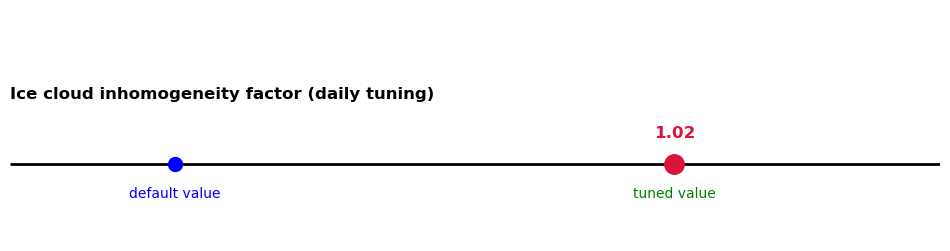

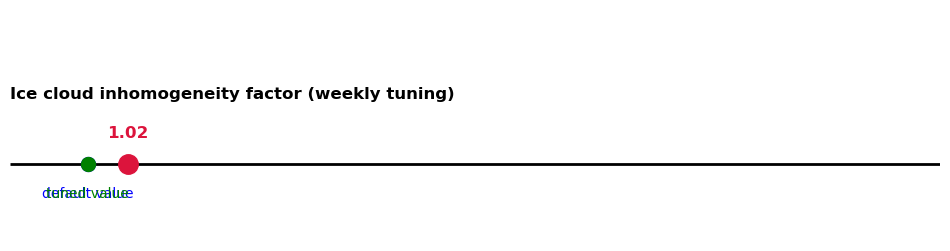

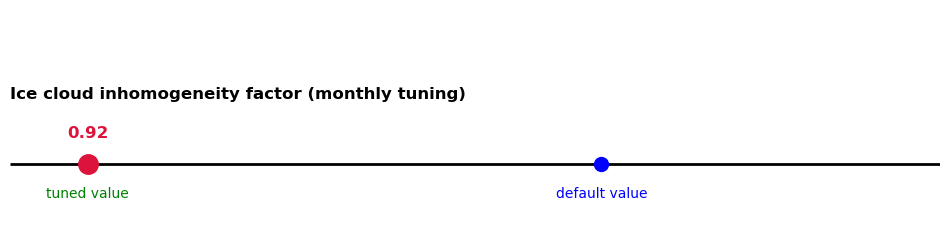

/tmp/ipykernel_1260593/4091178891.py:25: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(min_val, max_val)  # space for var_name label


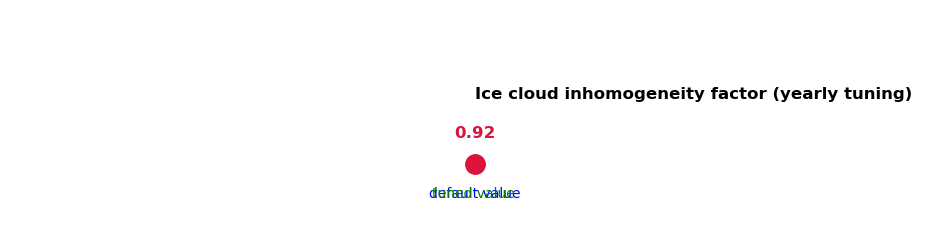

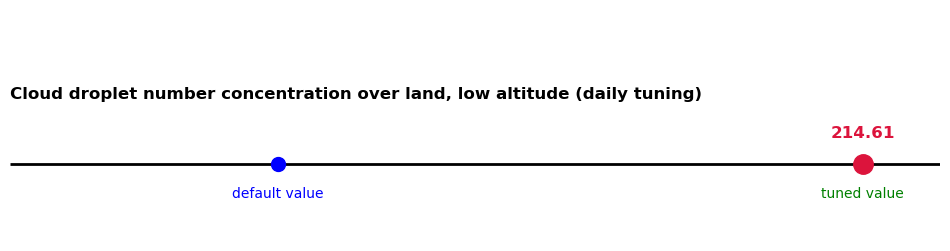

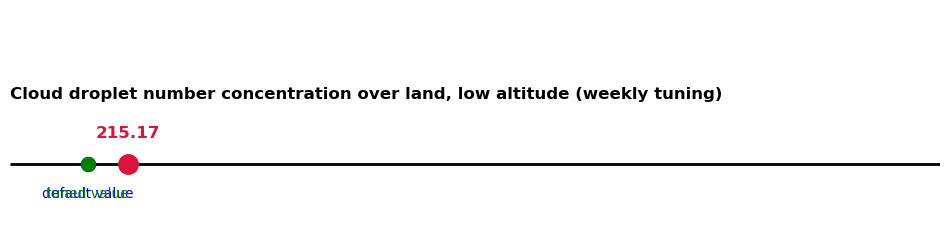

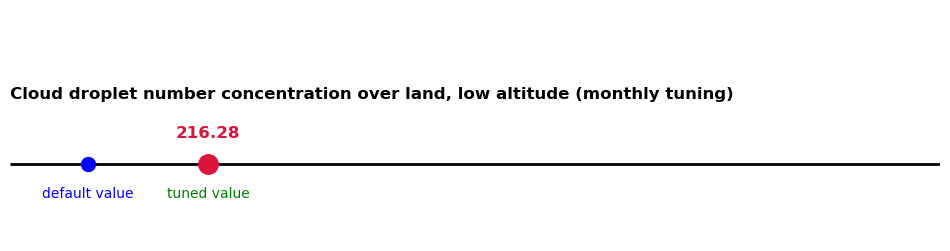

/tmp/ipykernel_1260593/4091178891.py:25: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(min_val, max_val)  # space for var_name label


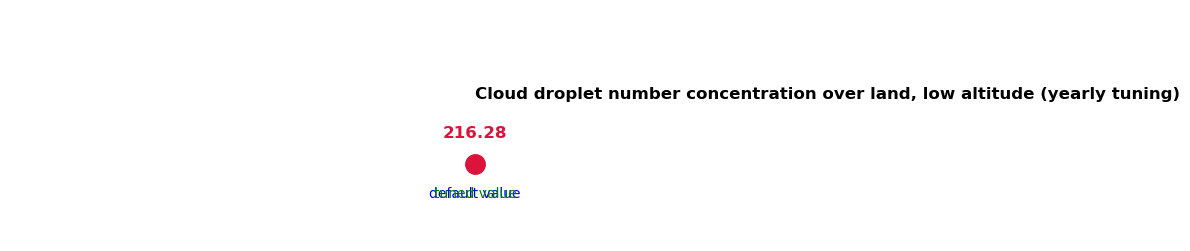

In [ ]:
# Day-, week-, month-, year-long tuning
log_files = ["log.auto_tune.12876603.o", "log.auto_tune.12889494.o", "log.auto_tune.12892616.o", "log.auto_tune.12962670.o"]

## cinhomi ##

# Read parameter values
param_values_daily = create_list("log.auto_tune.12876603.o", 16)[0] # 16 should be cinhomi
param_values_weekly = create_list("log.auto_tune.12889494.o", 16)[0] # 16 should be cinhomi
param_values_monthly = create_list("log.auto_tune.12892616.o", 16)[0] # 16 should be cinhomi
param_values_yearly = create_list("log.auto_tune.12962670.o", 16)[0] # 16 should be cinhomi

gif_path_1 = make_video(param_values_daily, param_values_weekly, 'Ice cloud inhomogeneity factor (daily tuning)', 'daily_cinhomi.gif')
gif_path_2 = make_video(param_values_weekly, param_values_monthly, 'Ice cloud inhomogeneity factor (weekly tuning)', 'weekly_cinhomi.gif')
gif_path_3 = make_video(param_values_monthly, param_values_yearly, 'Ice cloud inhomogeneity factor (monthly tuning)', 'monthly_cinhomi.gif')
gif_path_4 = make_video(param_values_yearly, [0.915], 'Ice cloud inhomogeneity factor (yearly tuning)', 'yearly_cinhomi.gif')

# Concatenate into one final gif
concatenate_gifs([gif_path_1, gif_path_2, gif_path_3], 'cinhomi', output_path)


## cn2land ##

# Read parameter values
param_values_daily = create_list("log.auto_tune.12876603.o", 21)[0] # 21 should be cn2land
param_values_weekly = create_list("log.auto_tune.12889494.o", 21)[0] # 21 should be cn2land
param_values_monthly = create_list("log.auto_tune.12892616.o", 21)[0] # 21 should be cn2land
param_values_yearly = create_list("log.auto_tune.12962670.o", 21)[0] # 21 should be cn2land

gif_path_1 = make_video(param_values_daily, param_values_weekly, 'Cloud droplet number concentration over land, low altitude (daily tuning)', 'daily_cn2land.gif')
gif_path_2 = make_video(param_values_weekly, param_values_monthly, 'Cloud droplet number concentration over land, low altitude (weekly tuning)', 'weekly_cn2land.gif')
gif_path_3 = make_video(param_values_monthly, param_values_yearly, 'Cloud droplet number concentration over land, low altitude (monthly tuning)', 'monthly_cn2land.gif')
gif_path_4 = make_video(param_values_yearly, [216.285], 'Cloud droplet number concentration over land, low altitude (yearly tuning)', 'yearly_cn2land.gif')

# Concatenate into one final gif
concatenate_gifs([gif_path_1, gif_path_2, gif_path_3], 'cn2land', output_path)